C:\Users\86185\AppData\Local\Temp\ipykernel_38456\3932616505.py:41: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_stroke_cleaned['bmi'].fillna(bmi_median, inplace=True)


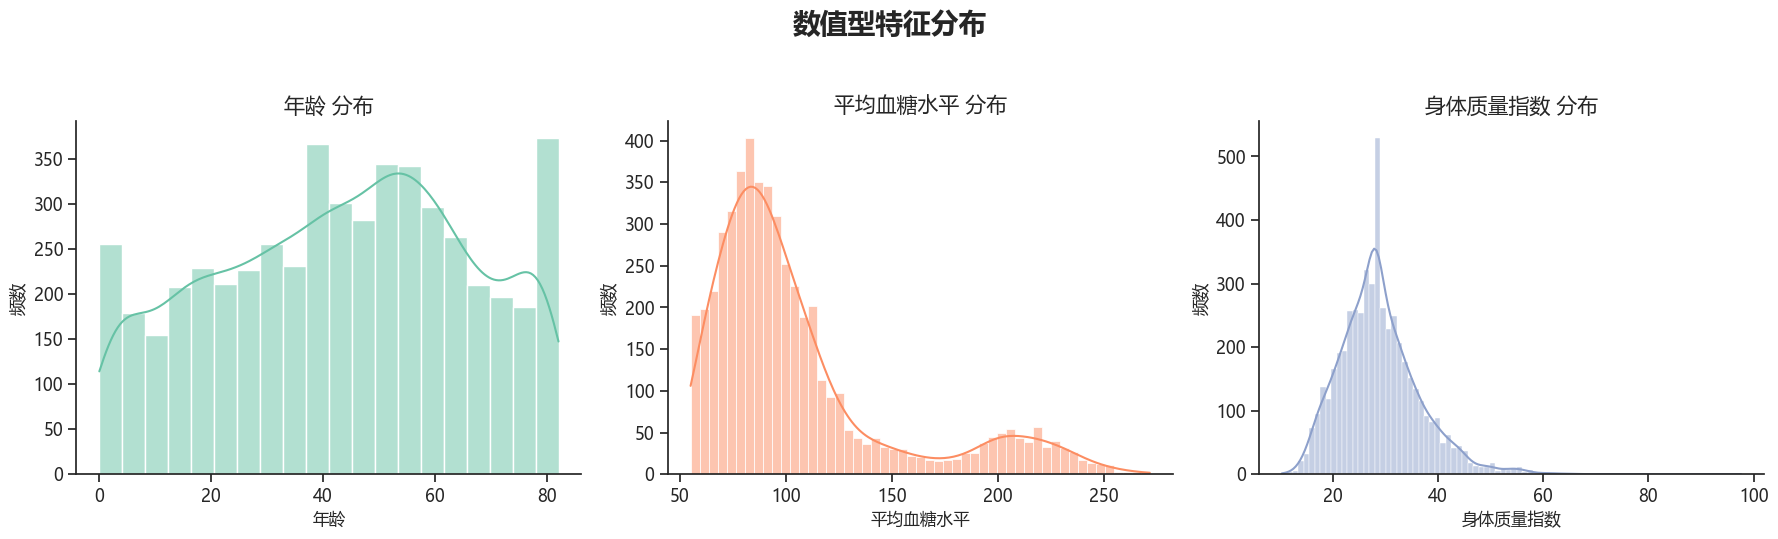

C:\Users\86185\AppData\Local\Temp\ipykernel_38456\3932616505.py:78: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='stroke', data=df_stroke_processed, palette="Paired")


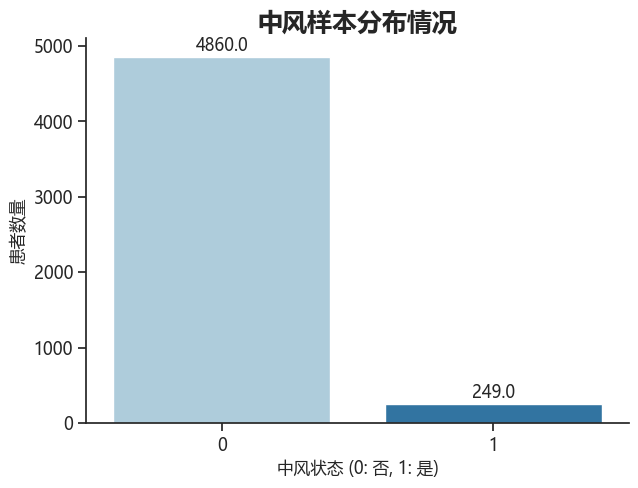

C:\Users\86185\AppData\Local\Temp\ipykernel_38456\3932616505.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke_processed, ax=axes[i], palette="Paired")
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\3932616505.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke_processed, ax=axes[i], palette="Paired")
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\3932616505.py:91: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='stroke', y=feature, data=df_stroke_processed

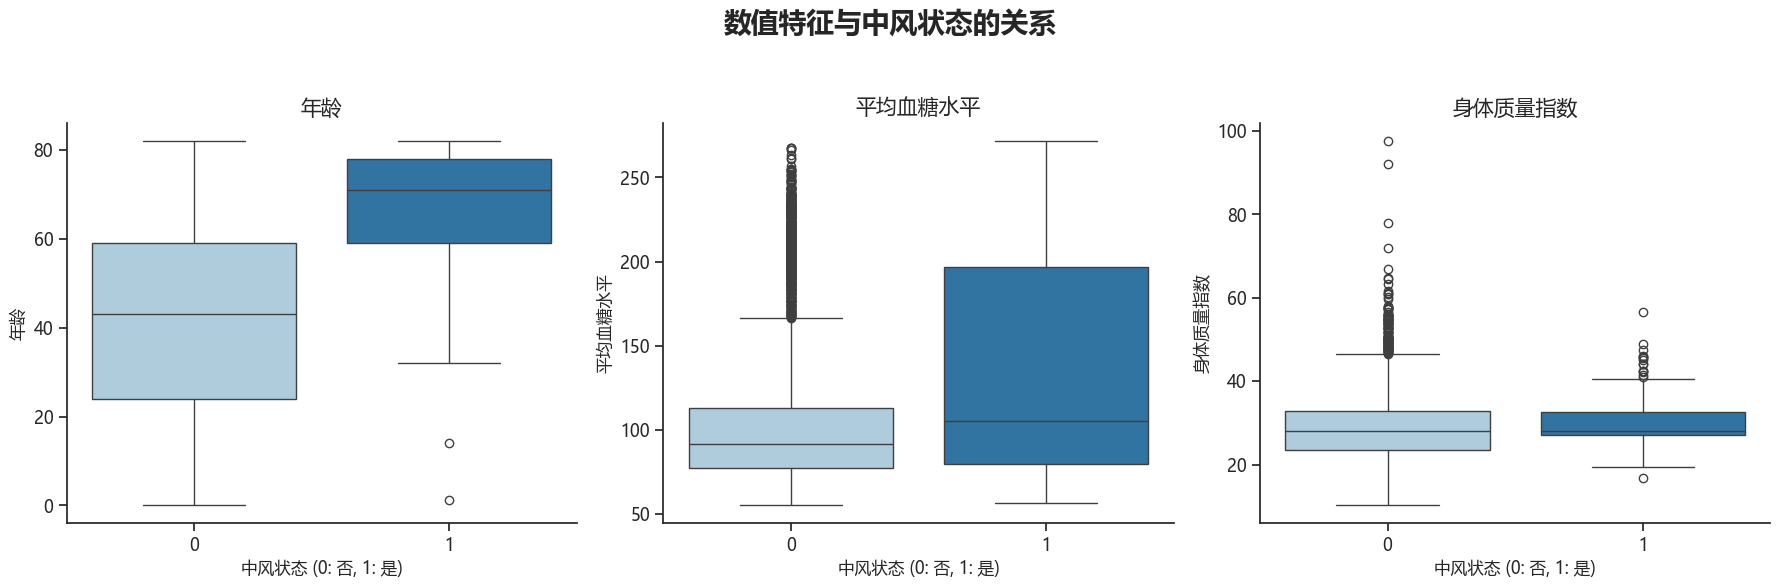

C:\Users\86185\AppData\Local\Temp\ipykernel_38456\3932616505.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=stroke_rate.index, y=stroke_rate.values, ax=axes[i], palette=palette)
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\3932616505.py:107: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=stroke_rate.index, y=stroke_rate.values, ax=axes[i], palette=palette)
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\3932616505.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=11)
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\3932616505.py:107: FutureWarning: 

Passing `palette` with

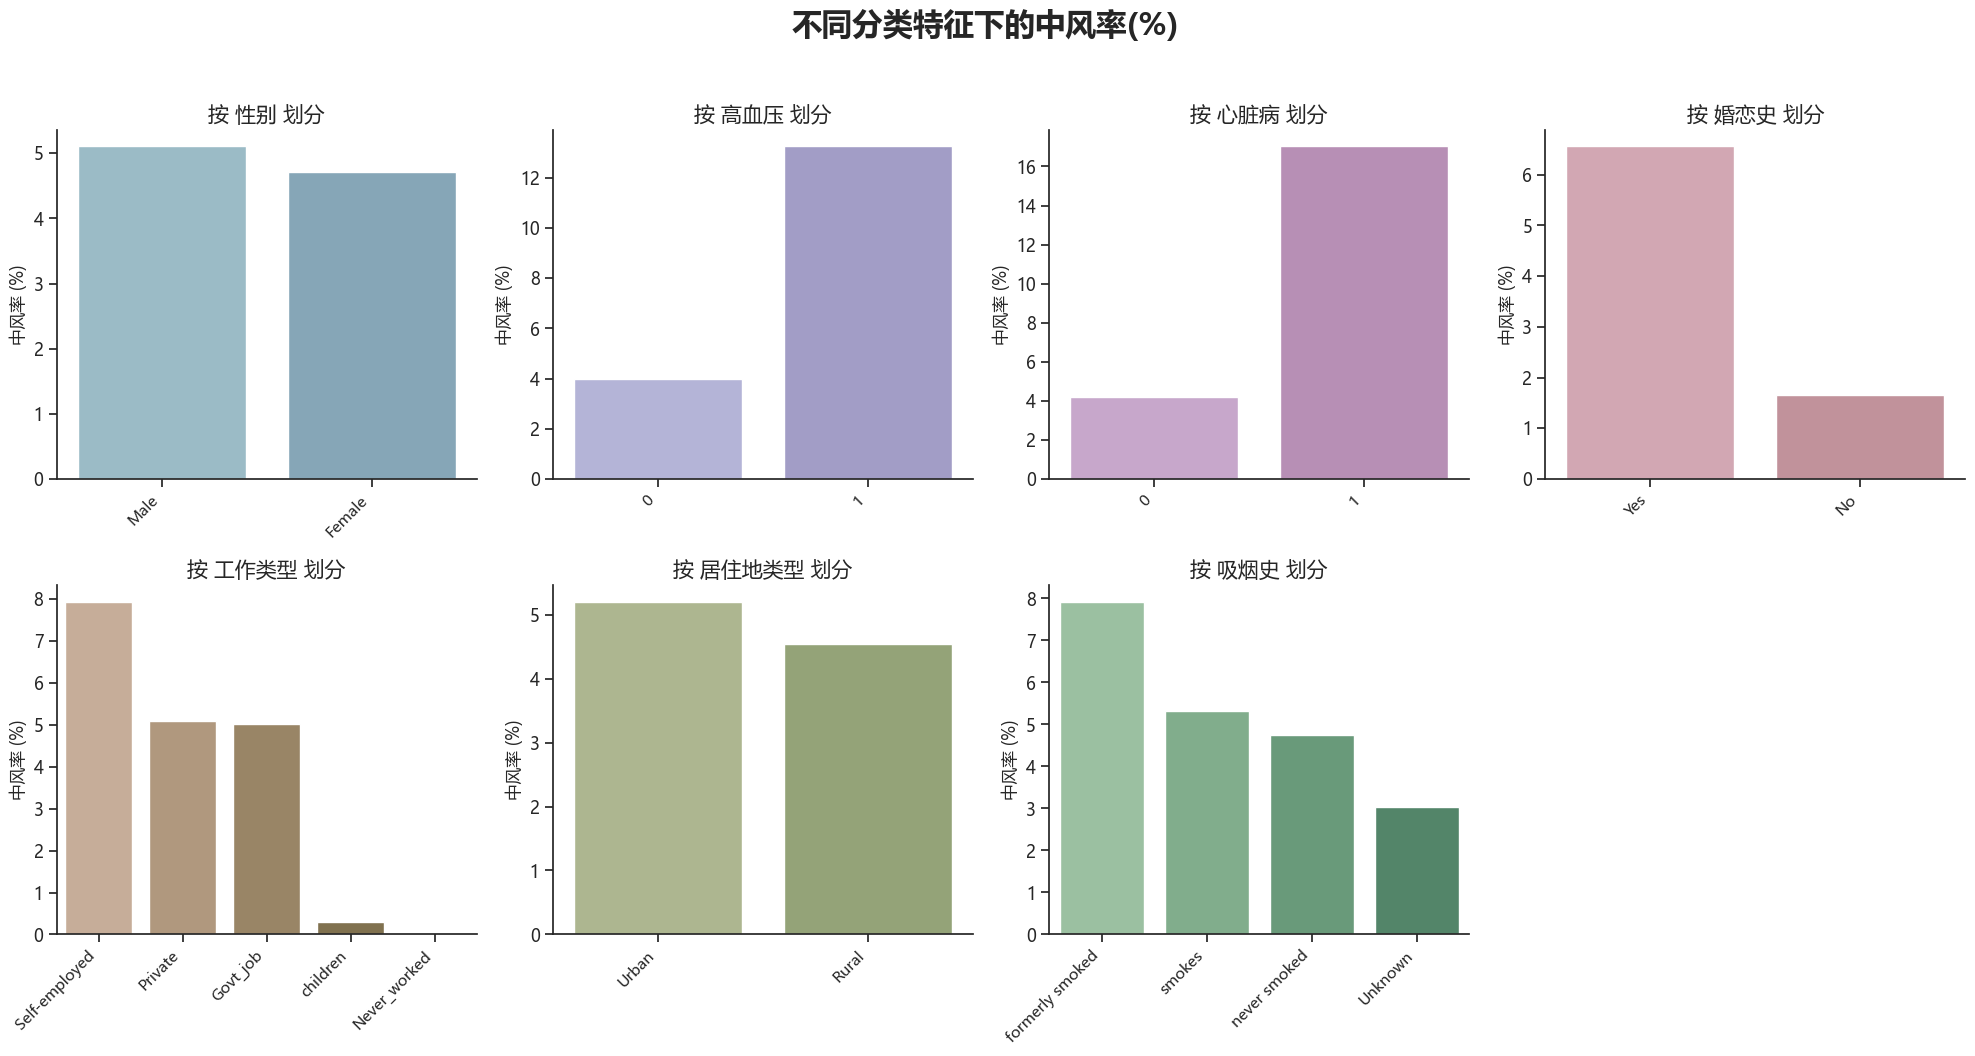

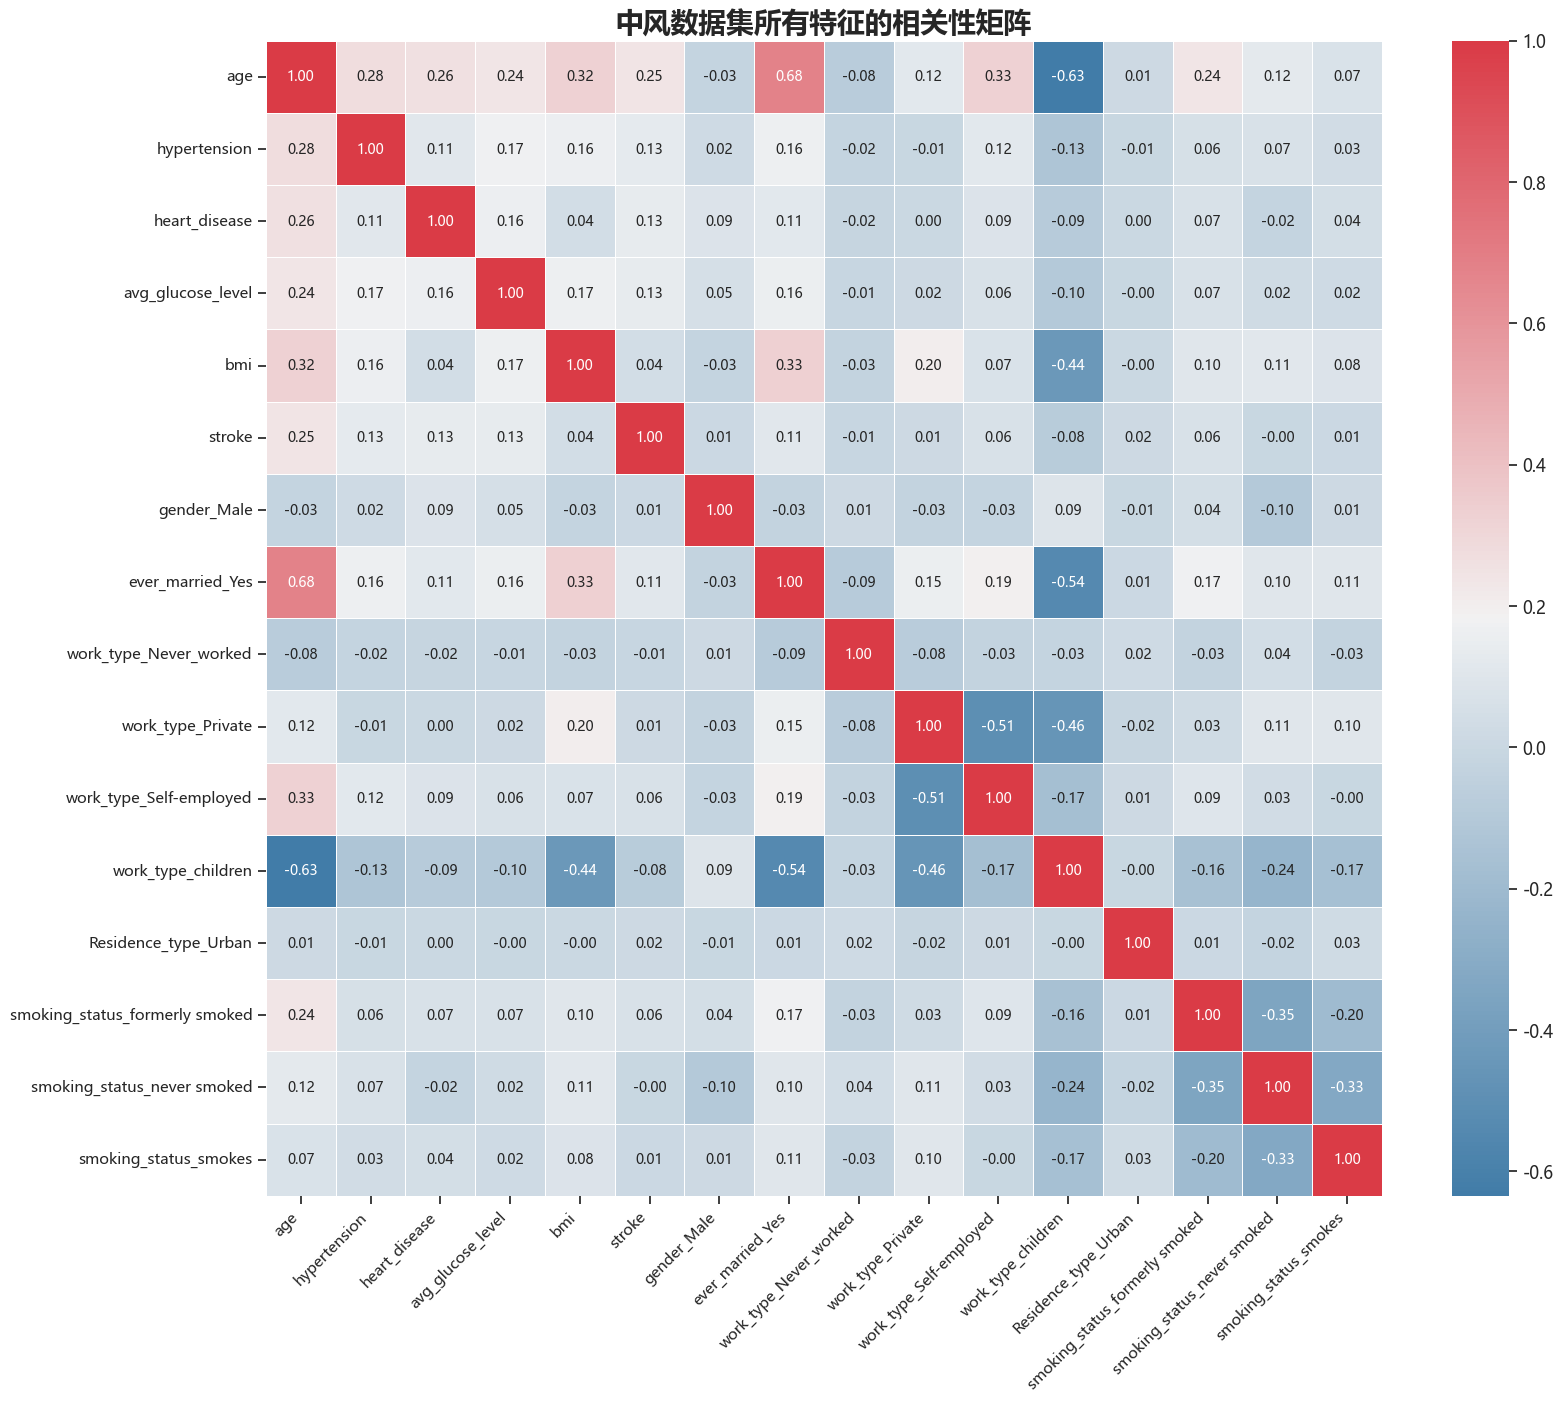

In [2]:
# ==============================================================================
# 0. 导入库与学术化环境设置
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# --- 全局学术化风格设定 ---
# 'style="ticks"' 设定了简洁的刻度风格，是学术图表常用选择
# 'font_scale=1.1' 适度放大字体，保证可读性
sns.set_theme(style="ticks", font_scale=1.1)

# --- 中文字体设置 ---
# 确保图表能正确显示中文，并处理负号显示问题
try:
    if sys.platform.startswith('win'):
        plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    elif sys.platform.startswith('darwin'):
        plt.rcParams['font.sans-serif'] = ['PingFang SC']
    elif sys.platform.startswith('linux'):
        plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False
except Exception:
    pass

# ==============================================================================
# 1. 数据预处理
# ==============================================================================
data_loaded_successfully = False
try:
    # 加载数据，路径是相对于Jupyter Notebook文件的
    df_stroke = pd.read_csv('2025B\data\stroke.csv')

    # 数据清洗
    df_stroke_cleaned = df_stroke.copy()
    df_stroke_cleaned = df_stroke_cleaned[df_stroke_cleaned['gender'] != 'Other']
    df_stroke_cleaned = df_stroke_cleaned.drop('id', axis=1)
    bmi_median = df_stroke_cleaned['bmi'].median()
    df_stroke_cleaned['bmi'].fillna(bmi_median, inplace=True)

    # 分类变量编码
    categorical_cols = ['gender', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    df_stroke_processed = pd.get_dummies(df_stroke_cleaned, columns=categorical_cols, drop_first=True)
    
    data_loaded_successfully = True

except FileNotFoundError:
    print("错误: 文件 '../data/stroke.csv' 未找到。请确认文件路径正确。")
except Exception as e:
    print(f"处理过程中出现错误: {e}")

# ==============================================================================
# 2. 探索性数据分析 (EDA)
# ==============================================================================
if data_loaded_successfully:
    
    # --- 准备中文标签映射 ---
    numerical_features_cn = {'age': '年龄', 'avg_glucose_level': '平均血糖水平', 'bmi': '身体质量指数'}
    col_names_cn = {'gender': '性别', 'hypertension': '高血压', 'heart_disease': '心脏病', 'ever_married': '婚恋史', 'work_type': '工作类型', 'Residence_type': '居住地类型', 'smoking_status': '吸烟史'}

    # --- (1) 单变量分析 ---
    numerical_features = ['age', 'avg_glucose_level', 'bmi']
    fig, axes = plt.subplots(1, 3, figsize=(18, 5.5))
    fig.suptitle('数值型特征分布', fontsize=20, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.histplot(df_stroke_processed[feature], kde=True, ax=axes[i], color=sns.color_palette("Set2")[i])
        axes[i].set_title(f'{numerical_features_cn.get(feature, feature)} 分布', fontsize=15)
        axes[i].set_xlabel(numerical_features_cn.get(feature, feature), fontsize=12)
        axes[i].set_ylabel('频数', fontsize=12)
    sns.despine()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    plt.figure(figsize=(7, 5))
    # 使用 'Paired' 调色板，色彩柔和且区分度高
    ax = sns.countplot(x='stroke', data=df_stroke_processed, palette="Paired")
    plt.title('中风样本分布情况', fontsize=18, fontweight='bold')
    plt.xlabel('中风状态 (0: 否, 1: 是)', fontsize=12)
    plt.ylabel('患者数量', fontsize=12)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12)
    sns.despine()
    plt.show()

    # --- (2) 双变量分析 ---
    fig, axes = plt.subplots(1, 3, figsize=(18, 6))
    fig.suptitle('数值特征与中风状态的关系', fontsize=20, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x='stroke', y=feature, data=df_stroke_processed, ax=axes[i], palette="Paired")
        axes[i].set_title(f'{numerical_features_cn.get(feature, feature)}', fontsize=15)
        axes[i].set_xlabel('中风状态 (0: 否, 1: 是)', fontsize=12)
        axes[i].set_ylabel(numerical_features_cn.get(feature, feature), fontsize=12)
    sns.despine()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    original_categorical_cols = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'Residence_type', 'smoking_status']
    fig, axes = plt.subplots(2, 4, figsize=(20, 11))
    axes = axes.flatten()
    fig.suptitle('不同分类特征下的中风率(%)', fontsize=22, fontweight='bold')
    for i, col in enumerate(original_categorical_cols):
        stroke_rate = df_stroke_cleaned.groupby(col)['stroke'].mean().sort_values(ascending=False) * 100
        # 使用 Cubehelix 调色板，生成有变化的颜色，适合多子图展示
        palette = sns.cubehelix_palette(start=i*0.4, rot=-0.2, dark=0.3, light=0.7)
        sns.barplot(x=stroke_rate.index, y=stroke_rate.values, ax=axes[i], palette=palette)
        axes[i].set_title(f'按 {col_names_cn.get(col, col)} 划分', fontsize=15)
        axes[i].set_ylabel('中风率 (%)', fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=11)
    axes[-1].set_visible(False)
    sns.despine()
    plt.tight_layout(rect=[0, 0.02, 1, 0.96])
    plt.show()

    # --- (3) 多变量分析 ---
    correlation_matrix = df_stroke_processed.corr()
    plt.figure(figsize=(18, 15))
    # 创建一个自定义的蓝-白-红发散调色板
    custom_cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=custom_cmap, linewidths=.5, annot_kws={"size": 10})
    plt.title('中风数据集所有特征的相关性矩阵', fontsize=20, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()

else:
    pass

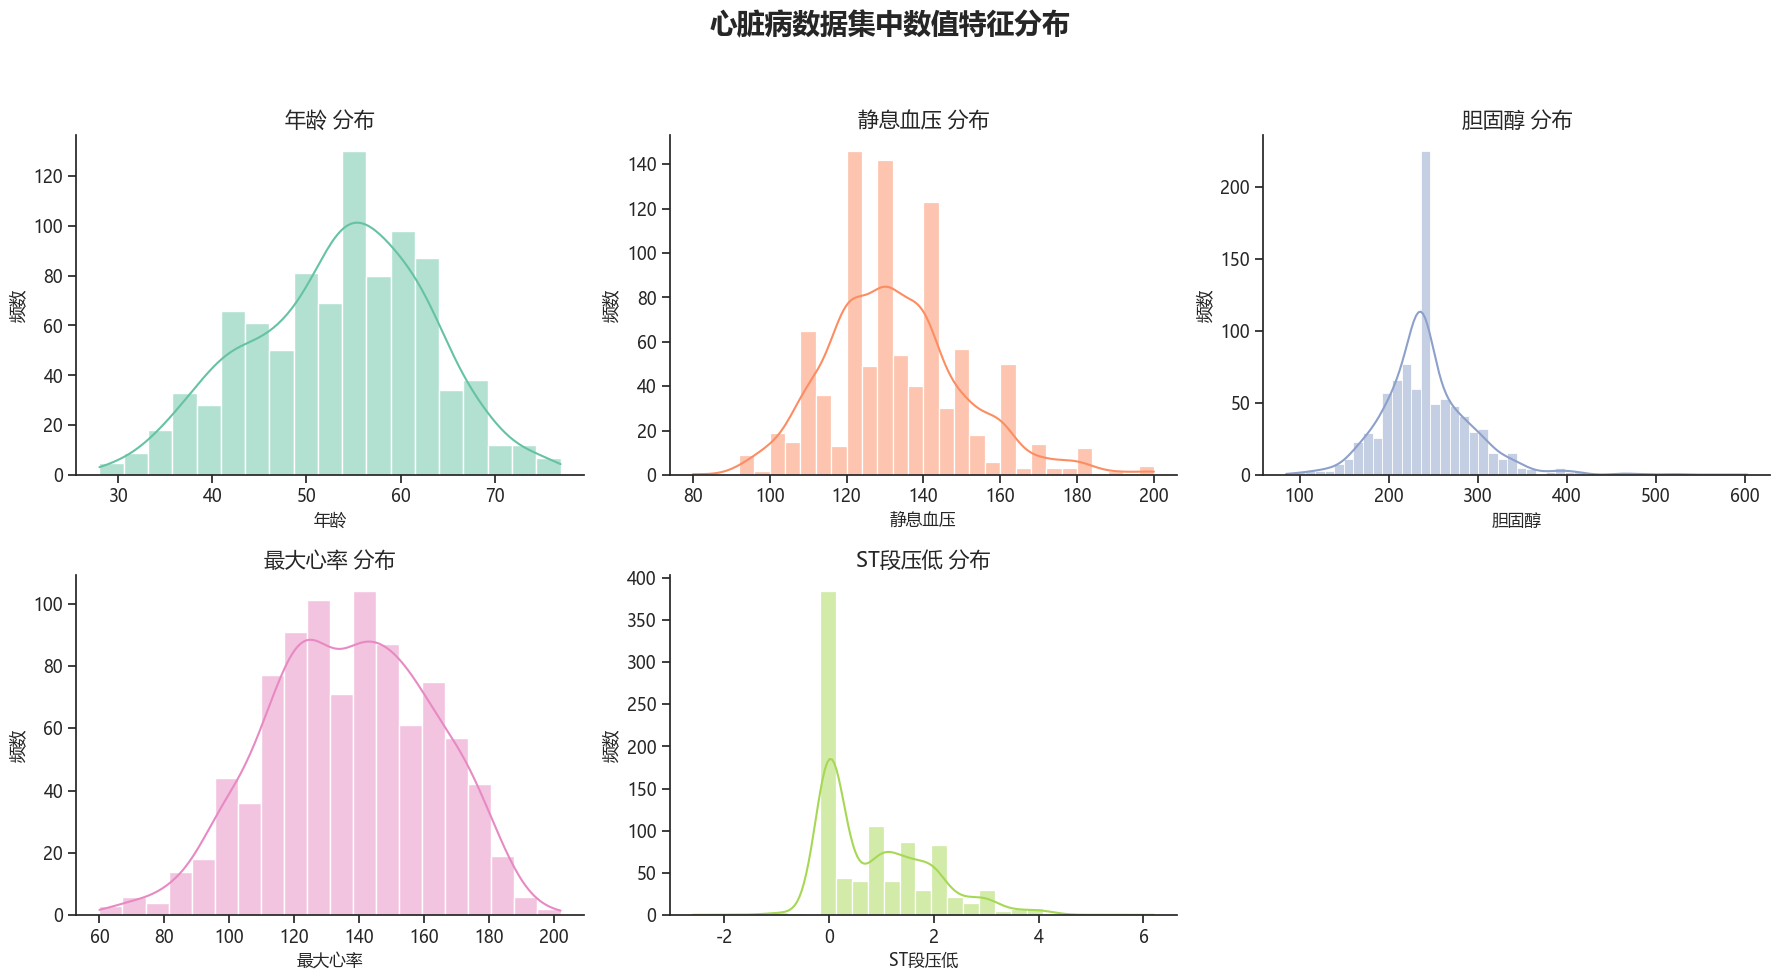

C:\Users\86185\AppData\Local\Temp\ipykernel_38456\86591344.py:74: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='HeartDisease', data=df_heart_processed, palette="Paired")


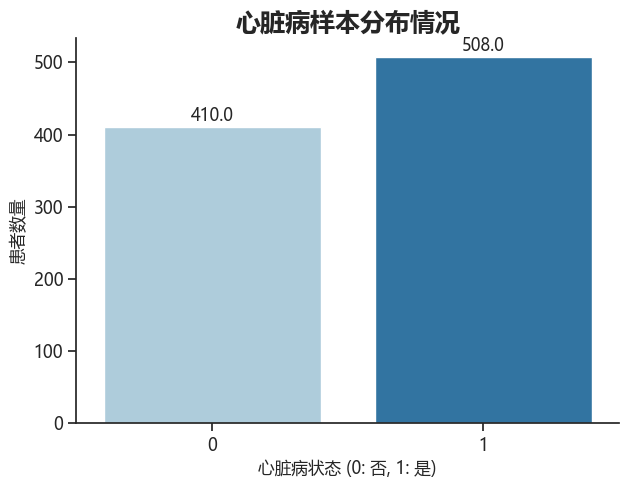

C:\Users\86185\AppData\Local\Temp\ipykernel_38456\86591344.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df_heart_processed, ax=axes[i], palette="Paired")
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\86591344.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df_heart_processed, ax=axes[i], palette="Paired")
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\86591344.py:88: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='HeartDisease', y=feature, data=df_heart_

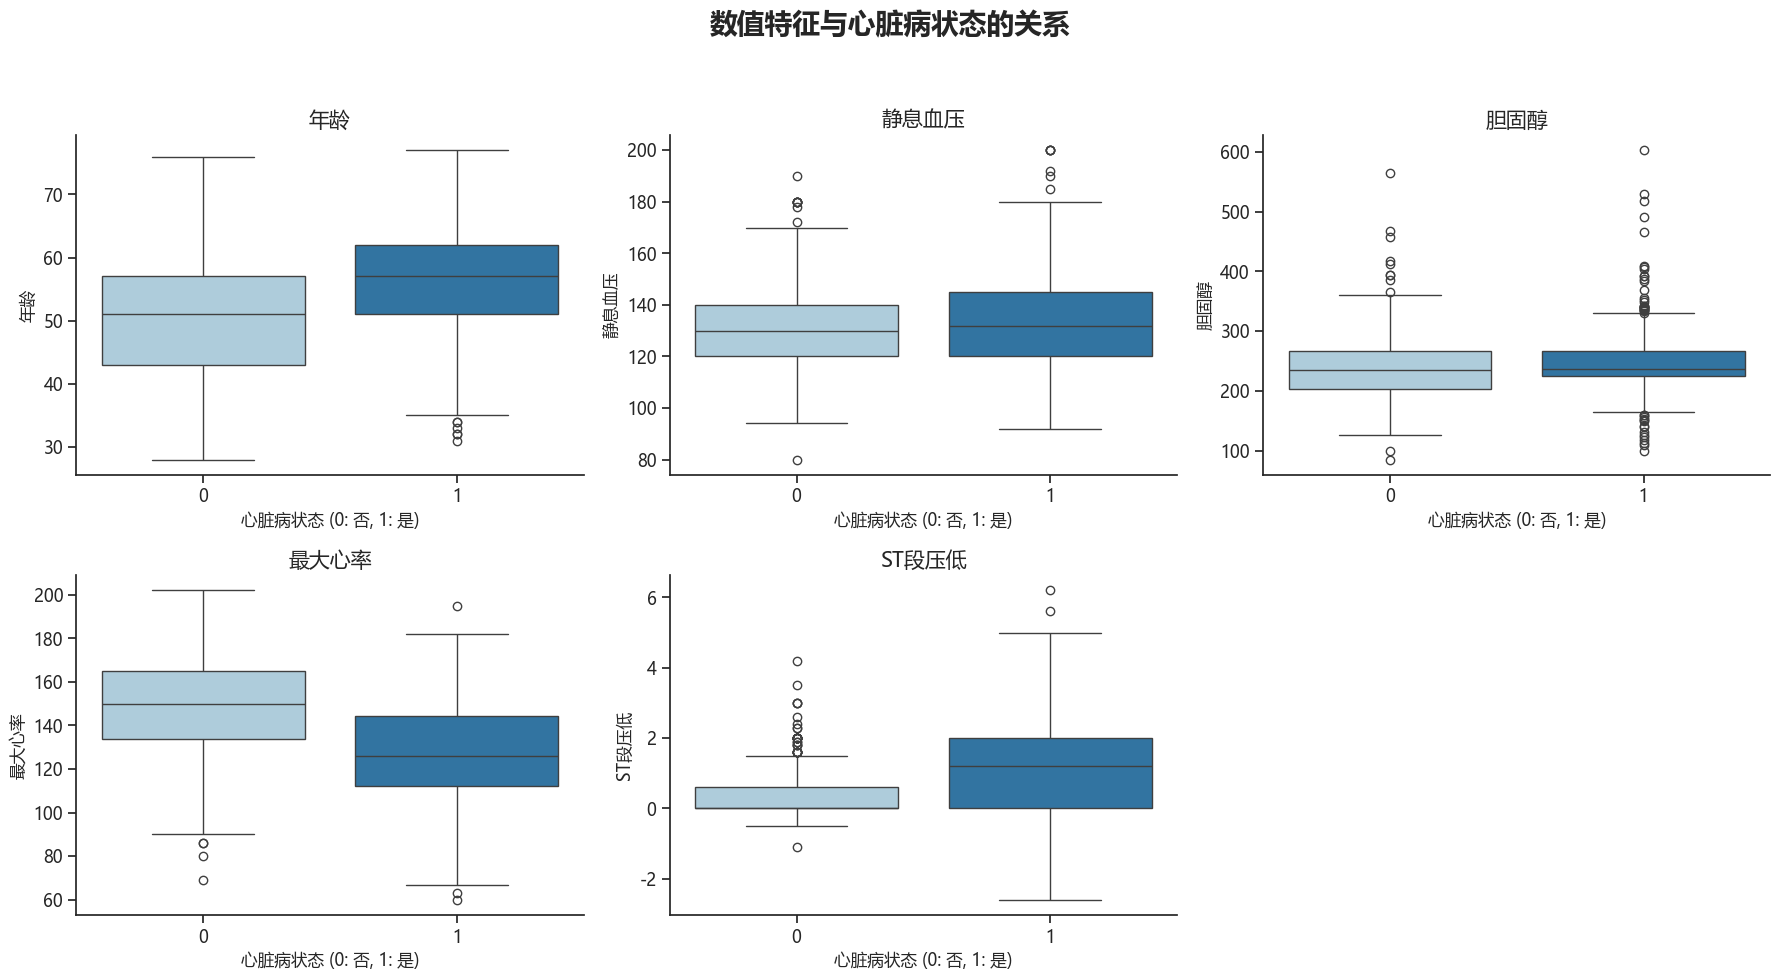

C:\Users\86185\AppData\Local\Temp\ipykernel_38456\86591344.py:104: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=disease_rate.index, y=disease_rate.values, ax=axes[i], palette=palette)
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\86591344.py:104: UserWarning: The palette list has more values (6) than needed (2), which may not be intended.
  sns.barplot(x=disease_rate.index, y=disease_rate.values, ax=axes[i], palette=palette)
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\86591344.py:108: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=11)
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\86591344.py:104: FutureWarning: 

Passing `palette` without 

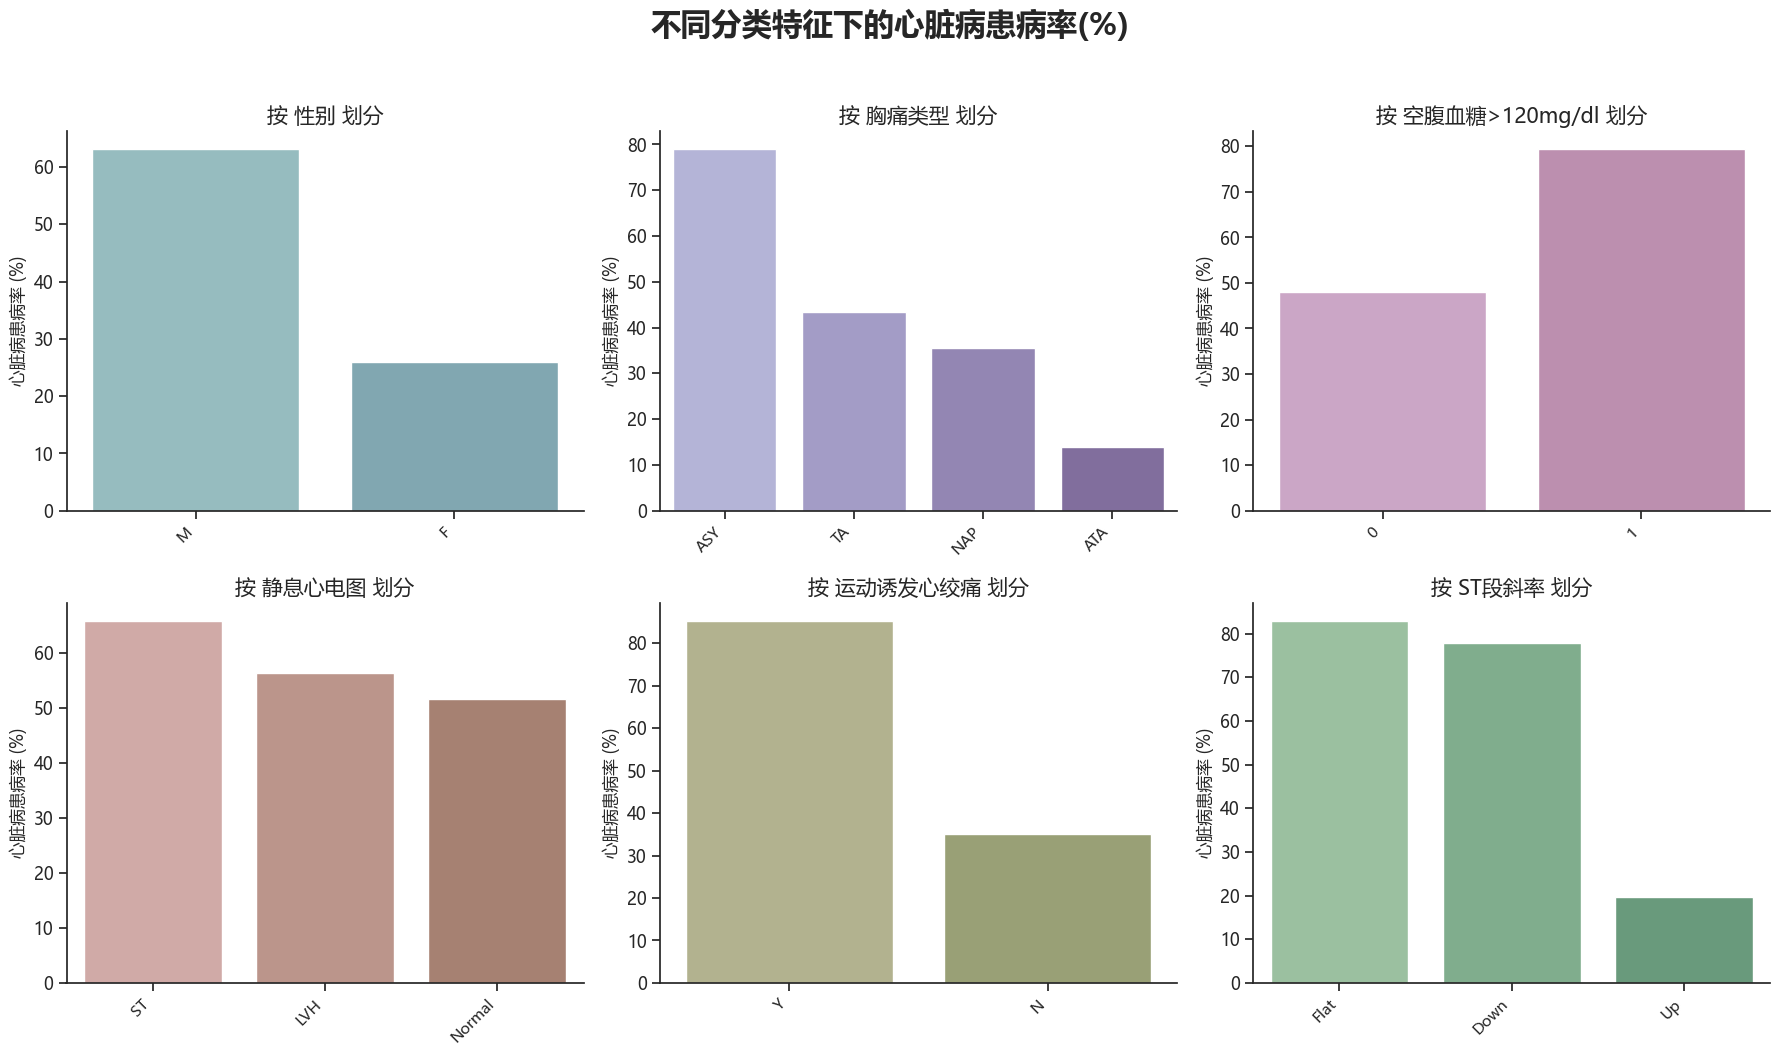

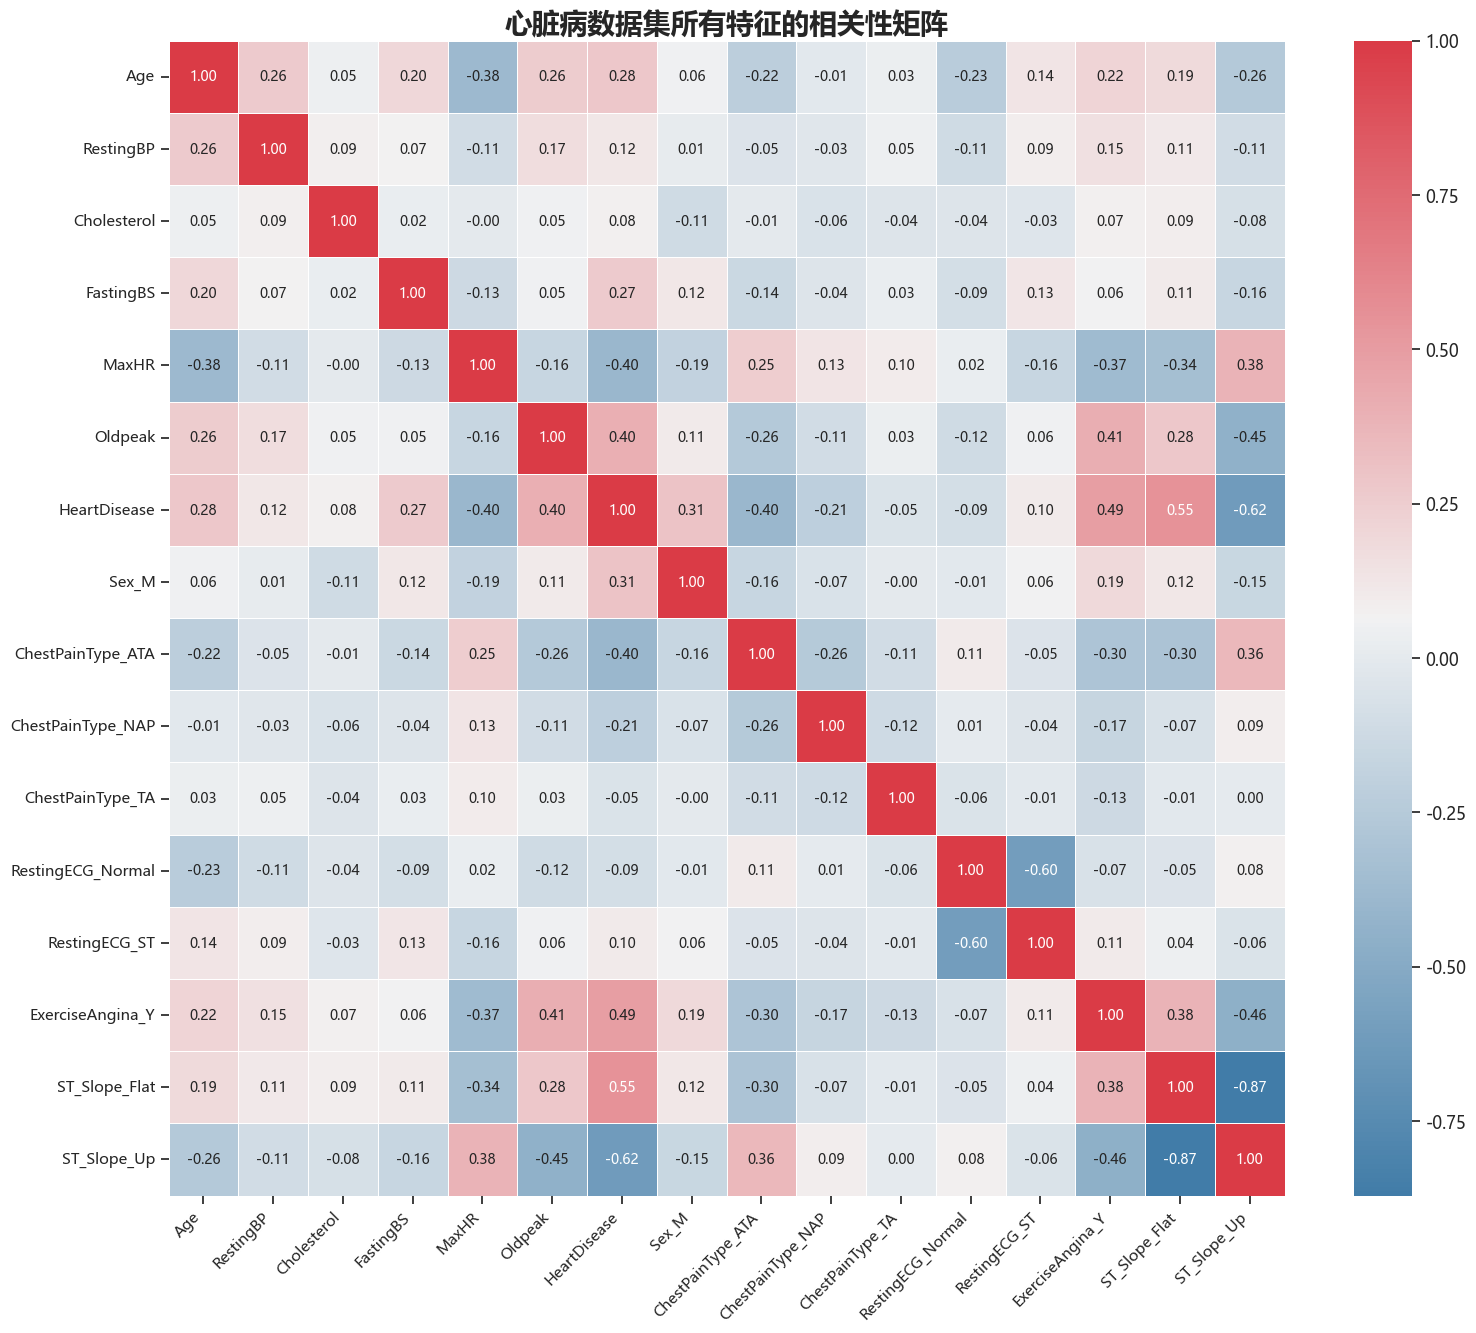

In [4]:
# ==============================================================================
# 0. 导入库与学术化环境设置
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# --- 全局学术化风格设定 ---
sns.set_theme(style="ticks", font_scale=1.1)

# --- 中文字体设置 ---
try:
    if sys.platform.startswith('win'):
        plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    elif sys.platform.startswith('darwin'):
        plt.rcParams['font.sans-serif'] = ['PingFang SC']
    elif sys.platform.startswith('linux'):
        plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False
except Exception:
    pass

# ==============================================================================
# 1. heart.csv 数据预处理
# ==============================================================================
data_loaded_successfully = False
try:
    df_heart = pd.read_csv('2025B\data\heart.csv')

    # 数据清洗：修正生理上不可能为0的指标
    # 使用该列非零数据的中位数进行填充，以保证稳健性
    for col in ['RestingBP', 'Cholesterol']:
        median_val = df_heart[df_heart[col] != 0][col].median()
        df_heart[col] = df_heart[col].replace(0, median_val)

    # 分类变量编码
    categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    df_heart_processed = pd.get_dummies(df_heart, columns=categorical_cols, drop_first=True)
    
    data_loaded_successfully = True

except FileNotFoundError:
    print("错误: 文件 '../data/heart.csv' 未找到。请确认文件路径。")
except Exception as e:
    print(f"处理过程中出现错误: {e}")

# ==============================================================================
# 2. heart.csv 探索性数据分析 (EDA)
# ==============================================================================
if data_loaded_successfully:
    
    # --- 准备中文标签映射 ---
    numerical_features_cn = {'Age': '年龄', 'RestingBP': '静息血压', 'Cholesterol': '胆固醇', 'MaxHR': '最大心率', 'Oldpeak': 'ST段压低'}
    categorical_features_cn = {'Sex': '性别', 'ChestPainType': '胸痛类型', 'FastingBS': '空腹血糖>120mg/dl', 'RestingECG': '静息心电图', 'ExerciseAngina': '运动诱发心绞痛', 'ST_Slope': 'ST段斜率'}

    # --- (1) 单变量分析 ---
    numerical_features = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    fig.suptitle('心脏病数据集中数值特征分布', fontsize=20, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.histplot(df_heart_processed[feature], kde=True, ax=axes[i], color=sns.color_palette("Set2")[i])
        axes[i].set_title(f'{numerical_features_cn.get(feature, feature)} 分布', fontsize=15)
        axes[i].set_xlabel(numerical_features_cn.get(feature, feature), fontsize=12)
        axes[i].set_ylabel('频数', fontsize=12)
    axes[-1].set_visible(False)
    sns.despine()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    plt.figure(figsize=(7, 5))
    ax = sns.countplot(x='HeartDisease', data=df_heart_processed, palette="Paired")
    plt.title('心脏病样本分布情况', fontsize=18, fontweight='bold')
    plt.xlabel('心脏病状态 (0: 否, 1: 是)', fontsize=12)
    plt.ylabel('患者数量', fontsize=12)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12)
    sns.despine()
    plt.show()

    # --- (2) 双变量分析 ---
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    fig.suptitle('数值特征与心脏病状态的关系', fontsize=20, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x='HeartDisease', y=feature, data=df_heart_processed, ax=axes[i], palette="Paired")
        axes[i].set_title(f'{numerical_features_cn.get(feature, feature)}', fontsize=15)
        axes[i].set_xlabel('心脏病状态 (0: 否, 1: 是)', fontsize=12)
        axes[i].set_ylabel(numerical_features_cn.get(feature, feature), fontsize=12)
    axes[-1].set_visible(False)
    sns.despine()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    original_categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
    fig, axes = plt.subplots(2, 3, figsize=(18, 11))
    axes = axes.flatten()
    fig.suptitle('不同分类特征下的心脏病患病率(%)', fontsize=22, fontweight='bold')
    for i, col in enumerate(original_categorical_cols):
        disease_rate = df_heart.groupby(col)['HeartDisease'].mean().sort_values(ascending=False) * 100
        palette = sns.cubehelix_palette(start=i*0.5, rot=-0.25, dark=0.3, light=0.7)
        sns.barplot(x=disease_rate.index, y=disease_rate.values, ax=axes[i], palette=palette)
        axes[i].set_title(f'按 {categorical_features_cn.get(col, col)} 划分', fontsize=15)
        axes[i].set_ylabel('心脏病患病率 (%)', fontsize=12)
        axes[i].set_xlabel('')
        axes[i].set_xticklabels(axes[i].get_xticklabels(), rotation=45, horizontalalignment='right', fontsize=11)
    sns.despine()
    plt.tight_layout(rect=[0, 0.02, 1, 0.96])
    plt.show()

    # --- (3) 多变量分析 ---
    correlation_matrix = df_heart_processed.corr()
    plt.figure(figsize=(18, 15))
    custom_cmap = sns.diverging_palette(240, 10, as_cmap=True)
    sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap=custom_cmap, linewidths=.5, annot_kws={"size": 10})
    plt.title('心脏病数据集所有特征的相关性矩阵', fontsize=20, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()

else:
    pass

C:\Users\86185\AppData\Local\Temp\ipykernel_38456\4230150897.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_cirrhosis_cleaned[col].fillna(median_val, inplace=True)
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\4230150897.py:43: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a co

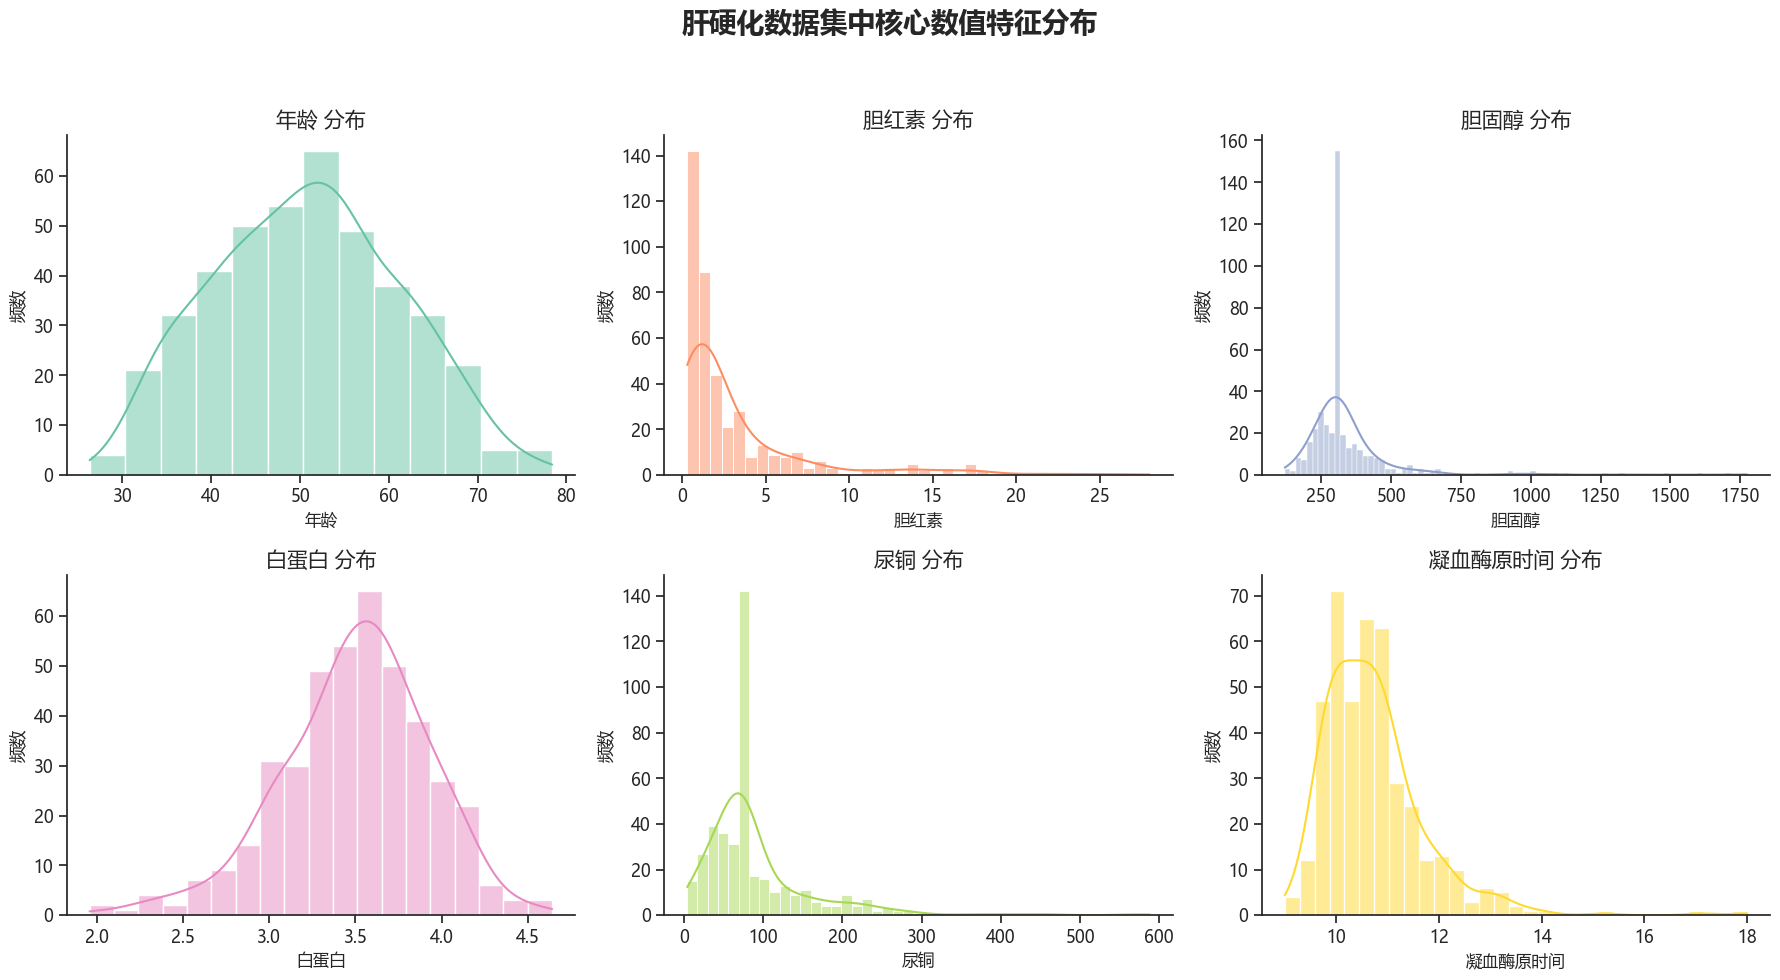

C:\Users\86185\AppData\Local\Temp\ipykernel_38456\4230150897.py:80: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x='Stage', data=df_cirrhosis_processed, palette="Paired")


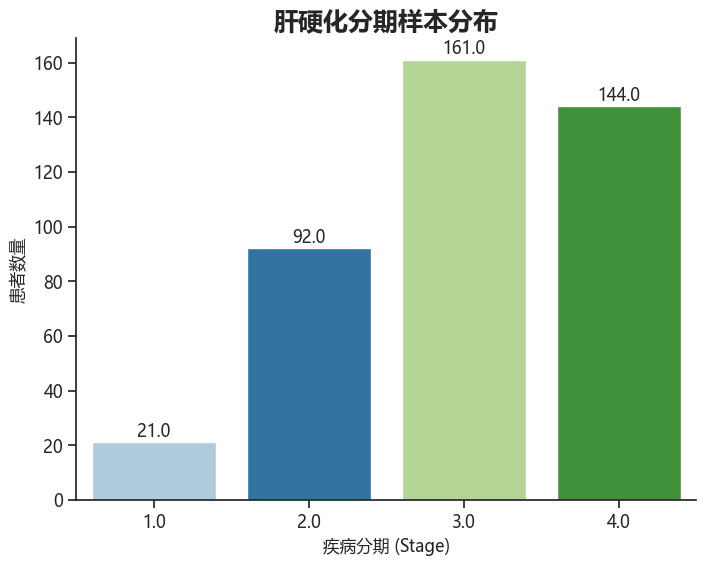

C:\Users\86185\AppData\Local\Temp\ipykernel_38456\4230150897.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=feature, data=df_cirrhosis_processed, ax=axes[i], palette="Paired")
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\4230150897.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=feature, data=df_cirrhosis_processed, ax=axes[i], palette="Paired")
C:\Users\86185\AppData\Local\Temp\ipykernel_38456\4230150897.py:94: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Stage', y=feature, data=df_cirrhosis_pro

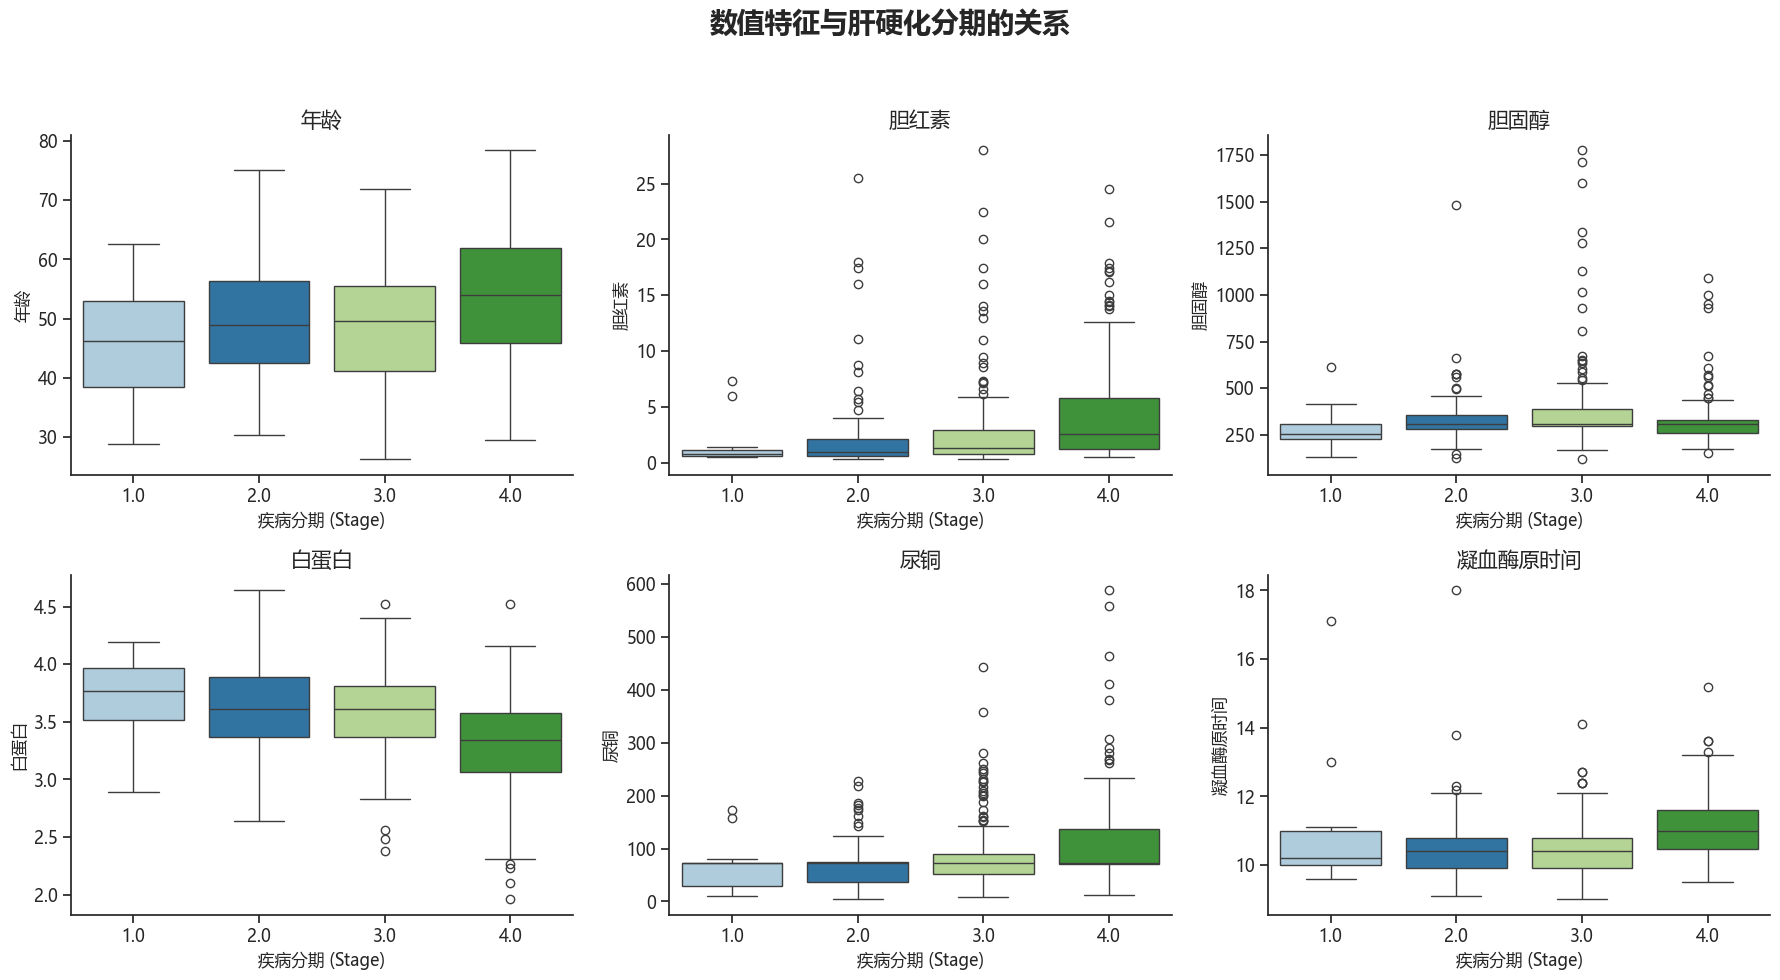

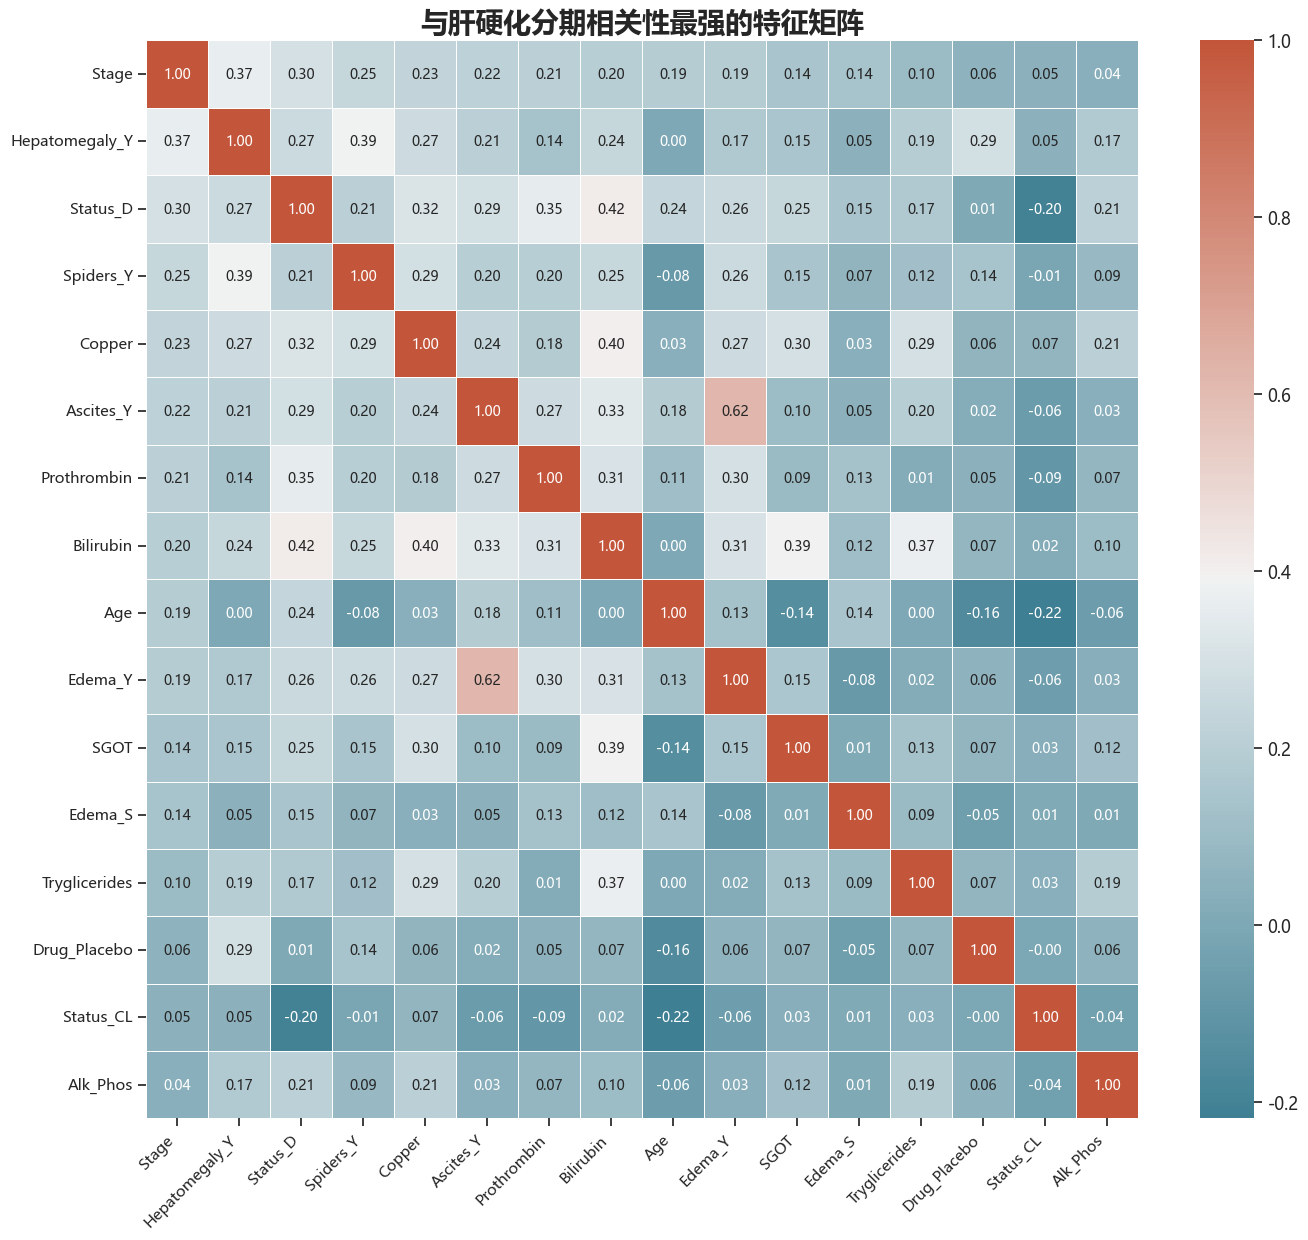

In [5]:
# ==============================================================================
# 0. 导入库与学术化环境设置
# ==============================================================================
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sys

# --- 全局学术化风格设定 ---
sns.set_theme(style="ticks", font_scale=1.1)

# --- 中文字体设置 ---
try:
    if sys.platform.startswith('win'):
        plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']
    elif sys.platform.startswith('darwin'):
        plt.rcParams['font.sans-serif'] = ['PingFang SC']
    elif sys.platform.startswith('linux'):
        plt.rcParams['font.sans-serif'] = ['WenQuanYi Zen Hei']
    plt.rcParams['axes.unicode_minus'] = False
except Exception:
    pass

# ==============================================================================
# 1. cirrhosis.csv 数据预处理
# ==============================================================================
data_loaded_successfully = False
try:
    df_cirrhosis = pd.read_csv('2025B\data\cirrhosis.csv')

    # 数据清洗
    # (1) 舍弃ID 和 对于预测分期无直接帮助的 N_Days 列
    df_cirrhosis_cleaned = df_cirrhosis.drop(['ID', 'N_Days'], axis=1)

    # (2) 年龄单位转换：从天数转换为年，更易于理解
    df_cirrhosis_cleaned['Age'] = (df_cirrhosis_cleaned['Age'] / 365.25).round(1)
    
    # (3) 填充缺失值：对所有数值型列，使用中位数进行填充
    numerical_cols_with_na = df_cirrhosis_cleaned.select_dtypes(include=np.number).columns[df_cirrhosis_cleaned.select_dtypes(include=np.number).isnull().any()].tolist()
    for col in numerical_cols_with_na:
        median_val = df_cirrhosis_cleaned[col].median()
        df_cirrhosis_cleaned[col].fillna(median_val, inplace=True)
        
    # (4) 分类变量编码
    # 将Stage作为目标变量，不对其进行独热编码
    categorical_cols = df_cirrhosis_cleaned.select_dtypes(include='object').columns.tolist()
    df_cirrhosis_processed = pd.get_dummies(df_cirrhosis_cleaned, columns=categorical_cols, drop_first=True)
    
    data_loaded_successfully = True

except FileNotFoundError:
    print("错误: 文件 '../data/cirrhosis.csv' 未找到。请确认文件路径。")
except Exception as e:
    print(f"处理过程中出现错误: {e}")

# ==============================================================================
# 2. cirrhosis.csv 探索性数据分析 (EDA) - 以 'Stage' 为目标
# ==============================================================================
if data_loaded_successfully:
    
    # --- 准备中文标签映射 ---
    cn_labels = {'Age': '年龄', 'Bilirubin': '胆红素', 'Cholesterol': '胆固醇', 'Albumin': '白蛋白', 'Copper': '尿铜', 'Alk_Phos': '碱性磷酸酶', 'SGOT': '转氨酶', 'Tryglicerides': '甘油三酯', 'Platelets': '血小板', 'Prothrombin': '凝血酶原时间', 'Stage': '肝硬化分期', 'Sex': '性别', 'Ascites': '腹水', 'Hepatomegaly': '肝肿大', 'Spiders': '蜘蛛痣', 'Edema': '水肿', 'Status': '患者状态', 'Drug': '药物类型'}

    # --- (1) 单变量分析 ---
    numerical_features = ['Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Prothrombin']
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    fig.suptitle('肝硬化数据集中核心数值特征分布', fontsize=20, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.histplot(df_cirrhosis_processed[feature], kde=True, ax=axes[i], color=sns.color_palette("Set2")[i])
        axes[i].set_title(f'{cn_labels.get(feature, feature)} 分布', fontsize=15)
        axes[i].set_xlabel(cn_labels.get(feature, feature), fontsize=12)
        axes[i].set_ylabel('频数', fontsize=12)
    sns.despine()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    plt.figure(figsize=(8, 6))
    ax = sns.countplot(x='Stage', data=df_cirrhosis_processed, palette="Paired")
    plt.title('肝硬化分期样本分布', fontsize=18, fontweight='bold')
    plt.xlabel('疾病分期 (Stage)', fontsize=12)
    plt.ylabel('患者数量', fontsize=12)
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 8), textcoords='offset points', fontsize=12)
    sns.despine()
    plt.show()

    # --- (2) 双变量分析 ---
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    axes = axes.flatten()
    fig.suptitle('数值特征与肝硬化分期的关系', fontsize=20, fontweight='bold')
    for i, feature in enumerate(numerical_features):
        sns.boxplot(x='Stage', y=feature, data=df_cirrhosis_processed, ax=axes[i], palette="Paired")
        axes[i].set_title(f'{cn_labels.get(feature, feature)}', fontsize=15)
        axes[i].set_xlabel('疾病分期 (Stage)', fontsize=12)
        axes[i].set_ylabel(cn_labels.get(feature, feature), fontsize=12)
    sns.despine()
    plt.tight_layout(rect=[0, 0, 1, 0.95])
    plt.show()

    # --- (3) 多变量分析 ---
    # 由于列数过多，我们选取与分期相关性最强的一部分特征进行展示
    corr_matrix = df_cirrhosis_processed.corr()
    # 找出与 'Stage' 相关性最强的15个特征
    top_features = corr_matrix.nlargest(16, 'Stage')['Stage'].index
    top_corr_matrix = df_cirrhosis_processed[top_features].corr()
    
    plt.figure(figsize=(16, 14))
    custom_cmap = sns.diverging_palette(220, 20, as_cmap=True)
    sns.heatmap(top_corr_matrix, annot=True, fmt='.2f', cmap=custom_cmap, linewidths=.5, annot_kws={"size": 10})
    plt.title('与肝硬化分期相关性最强的特征矩阵', fontsize=20, fontweight='bold')
    plt.xticks(rotation=45, ha='right', fontsize=11)
    plt.yticks(fontsize=11)
    plt.show()
    
else:
    pass

错误: 文件 '../data/stroke.csv' 未找到。请确认文件路径正确。
